In [3]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'



In [6]:
def plots(methods, folder, offset, epochs = 200, tests = ""):
    mpl.style.use('seaborn')
    for m in methods:
        temp = np.empty((3, epochs), np.float64)
        for i in range(3):
            t = np.array([])
            with open('./output_data/data_plots/' + folder +'/'+m + '_' +str(i+offset)+tests+'.csv') as f:
                for l in f:
                    t = np.append(t, float(l))
            temp[i] = t
        label = m[5:] if "cifar" in m else m
        mean = np.mean(temp, axis=0)
        plt.plot(range(epochs), mean, label=label)
        

    # plt.grid()
    plt.xlabel("Epoka")
    plt.ylabel("Wartość błędu")
    plt.legend(loc='best')
    # plt.title(label=title, pad=20.0)
    plt.show()


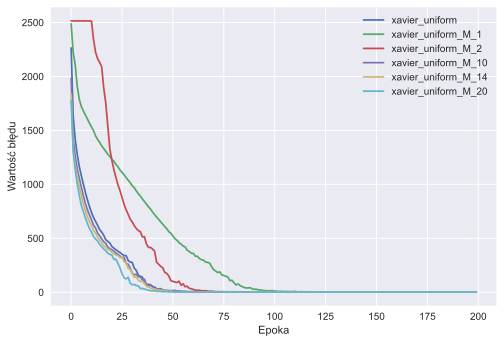

In [7]:
methods_intel = ["xavier_uniform", "xavier_uniform_M_1", "xavier_uniform_M_2", "xavier_uniform_M_10", "xavier_uniform_M_14", "xavier_uniform_M_20"]
plots(methods=methods_intel, folder="relu", offset=10)

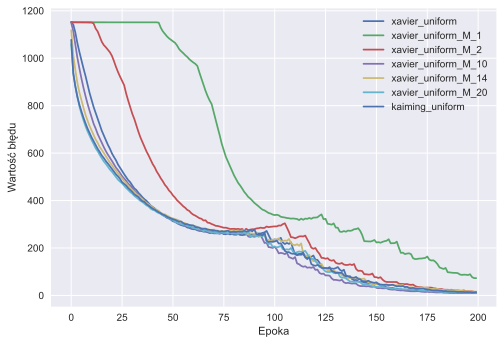

In [72]:
methods_cifar = ["cifarxavier_uniform", "cifarxavier_uniform_M_1", "cifarxavier_uniform_M_2", "cifarxavier_uniform_M_10", "cifarxavier_uniform_M_14", "cifarxavier_uniform_M_20", "cifarkaiming_uniform"]
plots(methods=methods_cifar, folder="relu", offset=10)


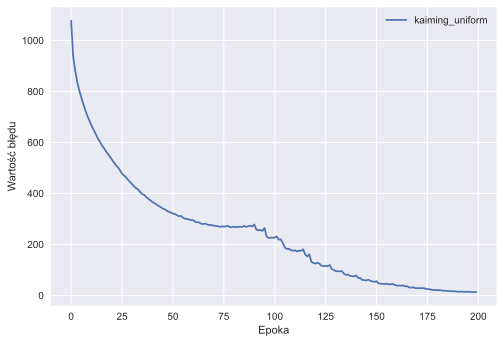

In [73]:
methods_cifar = ["cifarkaiming_uniform"]
plots(methods=methods_cifar, folder="kaiming", offset=0, epochs = 200)

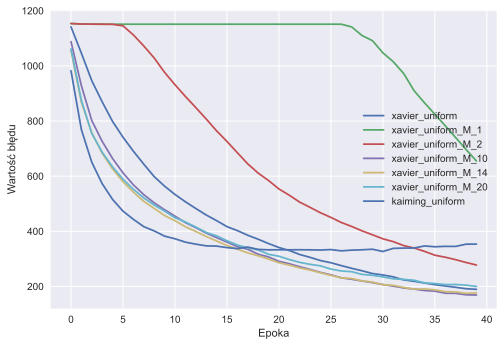

In [74]:
methods_cifar = ["cifarxavier_uniform", "cifarxavier_uniform_M_1", "cifarxavier_uniform_M_2", "cifarxavier_uniform_M_10", "cifarxavier_uniform_M_14", "cifarxavier_uniform_M_20", "cifarkaiming_uniform"]
plots(methods=methods_cifar, folder="tanh", offset=0, epochs = 40)

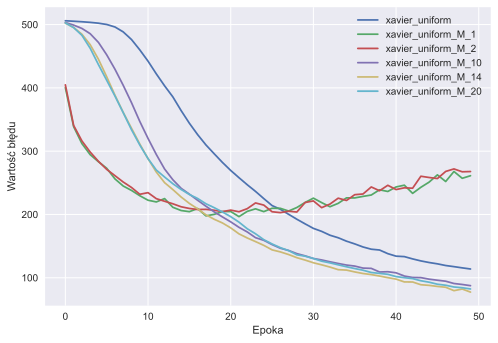

In [75]:
methods_intel = ["xavier_uniform", "xavier_uniform_M_1", "xavier_uniform_M_2", "xavier_uniform_M_10", "xavier_uniform_M_14", "xavier_uniform_M_20"]

plots(methods=methods_intel, folder="tanh", offset=3, epochs = 50)